In [1]:
#library imports
import pandas as pd
import numpy as np
import os
import datetime
from datetime import date
import matplotlib.pyplot as plt
from array import array
from scipy import stats


In [2]:
#get working directory
cwd = os.getcwd()
print(cwd)

C:\Users\ssi2309.60050\Downloads


#### reading in the data

In [3]:
#setting the directories (order = old to new)
dir_20230331 = '~\\Downloads\\results_230331'
dir_20230421 = '~\\Downloads\\results_230421_new3'
dir_20230720 = '~\\Downloads\\results_230720_new'
dir_20230830 = '~\\Downloads\\results_230830_new'
#all_230928.zip → not found, only have 08-09-2023 and 30-08-2023
dir_20231124 = '~\\Downloads\\results_231124'
dir_20231129 = '~\\Downloads\\results_231129' #(after a vocab update)
dir_20231206 = '~\\Downloads\\results_231206' #up to here all read in, not included in code further below

dir_20240112 = '~\\Downloads\\results 120124' #already included in the code below
dir_20240201 = '~\\Downloads\\results_240201' #already included in the code below
dir_20240219 = '~\\Downloads\\results_240219' #read in, not included in code further below


In [4]:
#reading in the table counts
march23_table_counts_df = pd.read_csv(f'{dir_20230331}\\countstables.csv')
apr23_table_counts_df = pd.read_csv(f'{dir_20230421}\\countstables.csv')
jul23_table_counts_df = pd.read_csv(f'{dir_20230720}\\countstables.csv')
aug23_table_counts_df = pd.read_csv(f'{dir_20230830}\\countstables.csv')
nov2324_table_counts_df = pd.read_csv(f'{dir_20231124}\\countstables.csv')
nov2329_table_counts_df = pd.read_csv(f'{dir_20231129}\\countstables.csv')
dec23_table_counts_df = pd.read_csv(f'{dir_20231206}\\countstables.csv')
#month23_table_counts_df = pd.read_csv(f'{...}\\countstables.csv')
jan24_table_counts_df = pd.read_csv(f'{dir_20240112}\\countstables.csv')
feb2401_table_counts_df = pd.read_csv(f'{dir_20240201}\\countstables.csv')
feb2419_table_counts_df = pd.read_csv(f'{dir_20240219}\\countstables.csv')

#setting df names as table_date
march23_table_counts_df.name = 'table_20230331'
apr23_table_counts_df.name = 'table_20230421'
jul23_table_counts_df.name = 'table_20230720'
aug23_table_counts_df.name = 'table_20230830'
nov2324_table_counts_df.name = 'table_20231124'
nov2329_table_counts_df.name = 'table_20231129'
dec23_table_counts_df.name = 'table_20231206'
#april23_table_counts_df.name= 'table_20230407'
jan24_table_counts_df.name = 'table_20240112'
feb2401_table_counts_df.name = 'table_20240201'
feb2419_table_counts_df.name = 'table_20240219'


#reading in concept counts
march23_concept_counts_df = pd.read_csv(f'{dir_20230331}\\countsconcepts.csv')
apr23_concept_counts_df = pd.read_csv(f'{dir_20230421}\\countsconcepts.csv')
jul23_concept_counts_df = pd.read_csv(f'{dir_20230720}\\countsconcepts.csv')
aug23_concept_counts_df = pd.read_csv(f'{dir_20230830}\\countsconcepts.csv')
nov2324_concept_counts_df = pd.read_csv(f'{dir_20231124}\\countsconcepts.csv')
nov2329_concept_counts_df = pd.read_csv(f'{dir_20231129}\\countsconcepts.csv')
dec23_concept_counts_df = pd.read_csv(f'{dir_20231206}\\countsconcepts.csv')
#april23_concept_counts_df = pd.read_csv(f'{dir_20230407}\\countsconcepts.csv')
jan24_concept_counts_df = pd.read_csv(f'{dir_20240112}\\countsconcepts.csv')
feb2401_concept_counts_df = pd.read_csv(f'{dir_20240201}\\countsconcepts.csv')
feb2419_concept_counts_df = pd.read_csv(f'{dir_20240219}\\countsconcepts.csv')


#setting df names as concept_date
march23_concept_counts_df.name = 'concept_20230331'
apr23_concept_counts_df.name = 'concept_20230421'
jul23_concept_counts_df.name = 'concept_20230720'
aug23_concept_counts_df.name = 'concept_20230830'
nov2324_concept_counts_df.name = 'concept_20231124'
nov2329_concept_counts_df.name = 'concept_20231129'
dec23_concept_counts_df.name = 'concept_20231206'
#april23_concept_counts_df.name='concept_20230407'
jan24_concept_counts_df.name = 'concept_20240112'
feb2401_concept_counts_df.name = 'concept_20240201'
feb2419_concept_counts_df.name = 'concept_20240219'


## Table counts analysis

In [5]:
#function to clean a table counts df
def clean_table_counts(df):
    #get the name of the df and drop _table_counts_df
    name_date = df.name
    count_date = name_date.replace('table_','count_')
    
    #drop irrelevant and duplicate columns
    clean_df = df.drop(columns = ["CountsID","ConceptID", "ValueConceptID"])
    
    #rename count columns for clarity
    clean_df = clean_df.rename(columns = {"Count":str(count_date)})
    
    return clean_df


In [6]:
#apply to all dfs
march23_table_clean  = clean_table_counts(march23_table_counts_df)
apr23_table_clean = clean_table_counts(apr23_table_counts_df)
jul23_table_clean = clean_table_counts(jul23_table_counts_df)
aug23_table_clean = clean_table_counts(aug23_table_counts_df)
nov2324_table_clean = clean_table_counts(nov2324_table_counts_df)
nov2329_table_clean = clean_table_counts(nov2329_table_counts_df)
dec23_table_clean = clean_table_counts(dec23_table_counts_df)
#april23_table_clean = clean_table_counts(april23_table_counts_df)
jan24_table_clean = clean_table_counts(jan24_table_counts_df)
feb2401_table_clean = clean_table_counts(feb2401_table_counts_df)
feb2419_table_clean = clean_table_counts(feb2419_table_counts_df)


In [7]:
#constructing a dataframe with all table counts
table_counts_df_1 = pd.merge(march23_table_clean, apr23_table_clean, on = "TableName", how = "inner") 
table_counts_df_2 = pd.merge(table_counts_df_1, jul23_table_clean, on = "TableName", how = "inner") 
table_counts_df_3 = pd.merge(table_counts_df_2, aug23_table_clean, on = "TableName", how = "inner") 
table_counts_df_4 = pd.merge(table_counts_df_3, nov2324_table_clean, on = "TableName", how = "inner") 
table_counts_df_5 = pd.merge(table_counts_df_4, nov2329_table_clean, on = "TableName", how = "inner")
table_counts_df_6 = pd.merge(table_counts_df_5, dec23_table_clean, on = "TableName", how = "inner") 
table_counts_df_7 = pd.merge(table_counts_df_6, jan24_table_clean, on = "TableName", how = "inner") 
table_counts_df_8 = pd.merge(table_counts_df_7, feb2401_table_clean, on = "TableName", how = "inner") 
all_table_counts_df = pd.merge(table_counts_df_8, feb2419_table_clean, on = "TableName", how = "inner") 


In [8]:
all_table_counts_df.head()
#feb2419_table_clean


,TableName,count_20230331,count_20230421,count_20230720,count_20230830,count_20231124,count_20231129,count_20231206,count_20240112,count_20240201,count_20240219
0,CDM_SOURCE,1,1,1,1,1,1,1,1,1,1
1,CONDITION_ERA,3719765,3750309,3752566,3753682,4197835,4052256,4052653,4256772,4336704,4341607
2,CONDITION_OCCURRENCE,3773735,3815270,3817738,3818928,4264191,4080750,4081162,4286860,4367805,4372796
3,DEATH,1473161,1473407,1473507,1473768,1474523,1474591,1474670,1490758,1495817,1496502
4,DEVICE_EXPOSURE,0,0,0,0,0,0,0,0,0,0


In [9]:
#count the days between each measurement
column_df = all_table_counts_df.columns
column_list = column_df.tolist()
column_list = column_list[1:11]

#get from column names to date strings
date_list = []
for name in column_list:
    name = name.replace('count_', '')
    print(name)
    date_list.append(name)

date_list


20230331
20230421
20230720
20230830
20231124
20231129
20231206
20240112
20240201
20240219


['20230331',
 '20230421',
 '20230720',
 '20230830',
 '20231124',
 '20231129',
 '20231206',
 '20240112',
 '20240201',
 '20240219']

In [10]:
#get from date strings to dates

#get string version of dates
d0 = date_list[0]
d0 = datetime.datetime.strptime(str(d0),"%Y%m%d").date()
d1 = datetime.datetime.strptime(str(date_list[1]),"%Y%m%d").date()
delta1 = d1 - d0
day_difference1 = delta1.days

#for difference between first and d2 (third) date
d2 = datetime.datetime.strptime(str(date_list[2]),"%Y%m%d").date()
delta2 = d2 - d0
day_difference2 = delta2.days

#for d3 vs the first date
d3 = datetime.datetime.strptime(str(date_list[3]),"%Y%m%d").date()
delta3 = d3 - d0
day_difference3 = delta3.days


def day_difference(number : int):
    d0 = date_list[0]
    d0 = datetime.datetime.strptime(str(d0),"%Y%m%d").date()
    day = datetime.datetime.strptime(str(date_list[number]),"%Y%m%d").date()
    delta = day - d0
    day_difference = delta.days
    return day_difference
    

#add the remaining days (10 dates -> 9 differences)
day_difference4 = day_difference(4)
day_difference5 = day_difference(5)
day_difference6 = day_difference(6)
day_difference7 = day_difference(7)
day_difference8 = day_difference(8)
day_difference9 = day_difference(9)


#put them into a list, with the first count at day 0
day_difference0 = 0
difference_list = [day_difference0, day_difference1, day_difference2, day_difference3, day_difference4, day_difference5,
                  day_difference6, day_difference7, day_difference8, day_difference9]
difference_list



[0, 21, 111, 152, 238, 243, 250, 287, 307, 325]

In [11]:
d_test1 = datetime.datetime.strptime("20240201","%Y%m%d").date()
d_test2 = datetime.datetime.strptime("20230407","%Y%m%d").date()
delta_test = d_test1 - d_test2
day_difference_test = delta_test.days
day_difference_test

300

#### for visualizations
Construct a new dataframe to allow for groupby visualizations for counts vs days

In [12]:
#put difference indications into the clean table count dfs
march23_table_clean["day"] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
apr23_table_clean["day"] = [21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21]
jul23_table_clean["day"] = [111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111]
aug23_table_clean["day"] = [152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152]
nov2324_table_clean["day"] = [238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238] #has a weird increase
nov2329_table_clean["day"] = [243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243] 
dec23_table_clean["day"] = [250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250]
jan24_table_clean["day"] = [287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287]
feb2401_table_clean["day"] = [307,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307]
feb2419_table_clean["day"] = [325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325]


In [13]:
all_table_counts_df.head()

,TableName,count_20230331,count_20230421,count_20230720,count_20230830,count_20231124,count_20231129,count_20231206,count_20240112,count_20240201,count_20240219
0,CDM_SOURCE,1,1,1,1,1,1,1,1,1,1
1,CONDITION_ERA,3719765,3750309,3752566,3753682,4197835,4052256,4052653,4256772,4336704,4341607
2,CONDITION_OCCURRENCE,3773735,3815270,3817738,3818928,4264191,4080750,4081162,4286860,4367805,4372796
3,DEATH,1473161,1473407,1473507,1473768,1474523,1474591,1474670,1490758,1495817,1496502
4,DEVICE_EXPOSURE,0,0,0,0,0,0,0,0,0,0


In [14]:
#change all column names with counts to only count
march23_table_clean = march23_table_clean.rename(columns = {"count_20230331":"count"})
apr23_table_clean = apr23_table_clean.rename(columns = {"count_20230421":"count"})
jul23_table_clean = jul23_table_clean.rename(columns = {"count_20230720":"count"})
aug23_table_clean = aug23_table_clean.rename(columns = {"count_20230830":"count"})
nov2324_table_clean = nov2324_table_clean.rename(columns = {"count_20231124":"count"}) #has a weird increase
nov2329_table_clean = nov2329_table_clean.rename(columns = {"count_20231129":"count"})
dec23_table_clean = dec23_table_clean.rename(columns = {"count_20231206":"count"})
#2024 counts
jan24_table_clean = jan24_table_clean.rename(columns = {"count_20240112":"count"})
feb2401_table_clean = feb2401_table_clean.rename(columns = {"count_20240201":"count"})
feb2419_table_clean = feb2419_table_clean.rename(columns = {"count_20240219":"count"})




In [15]:
#CHANGE dataframe names below 

#restructure the df to allow groupby on counts
vis_table_counts = pd.concat([march23_table_clean, apr23_table_clean, jul23_table_clean, aug23_table_clean, 
                              nov2324_table_clean, nov2329_table_clean, dec23_table_clean, jan24_table_clean,
                              feb2401_table_clean, feb2419_table_clean]) 
#vis_table_counts = pd.concat([april23_table_clean, jan24_table_clean]) 
vis_table_counts.head(17)


,TableName,count,day
0,CDM_SOURCE,1,0
1,CONDITION_ERA,3719765,0
2,CONDITION_OCCURRENCE,3773735,0
3,DEATH,1473161,0
4,DEVICE_EXPOSURE,0,0
5,DOSE_ERA,0,0
6,DRUG_ERA,803247,0
7,DRUG_EXPOSURE,1104574,0
8,EPISODE,5587312,0
9,EPISODE_EVENT,31259659,0


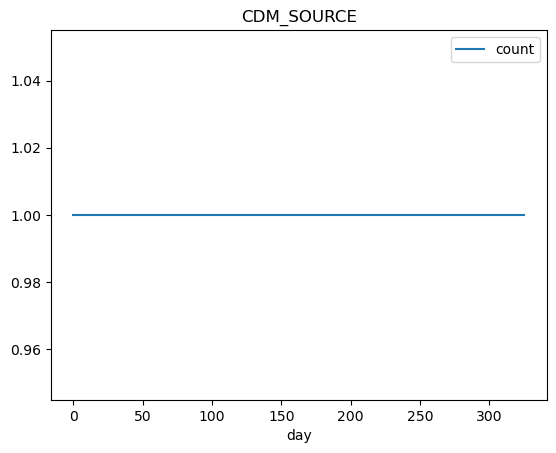

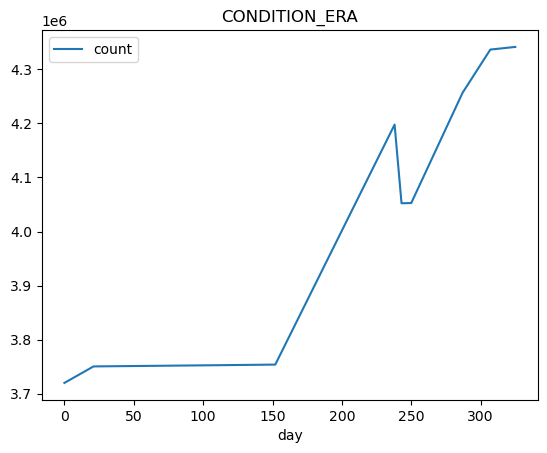

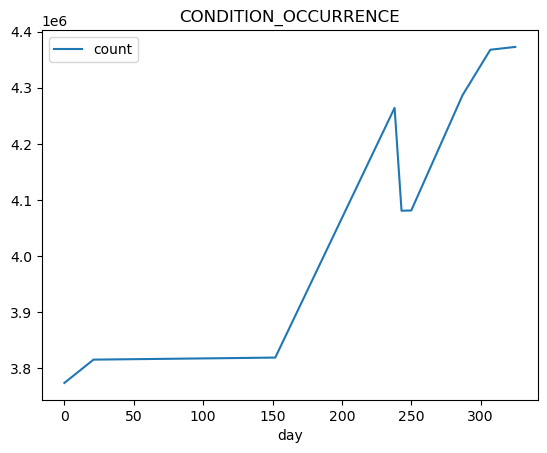

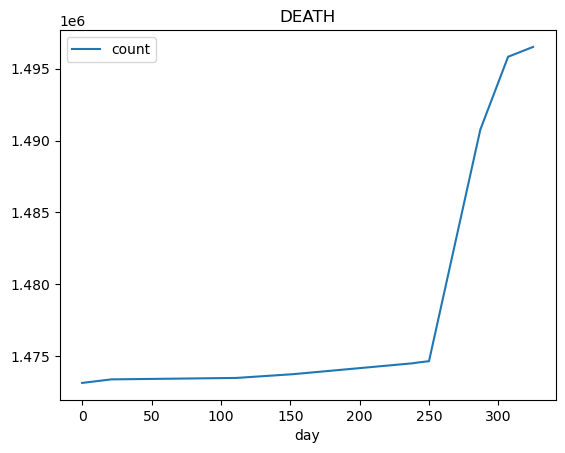

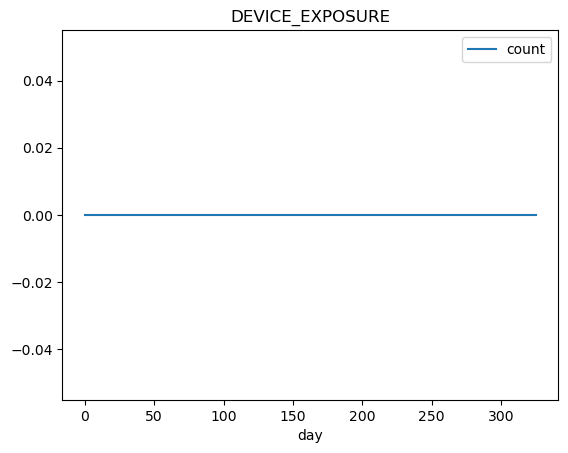

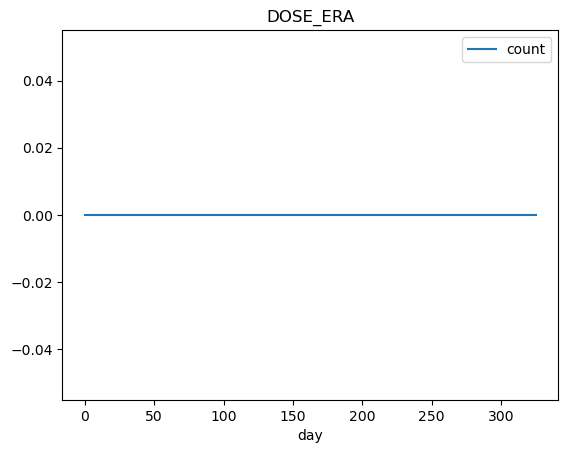

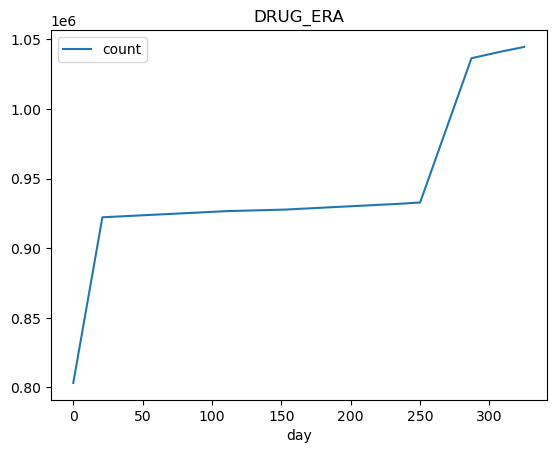

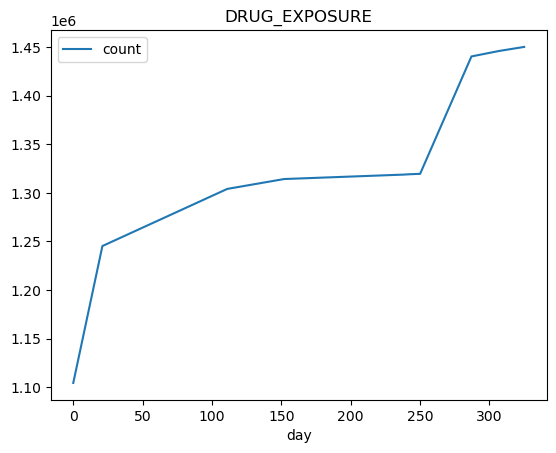

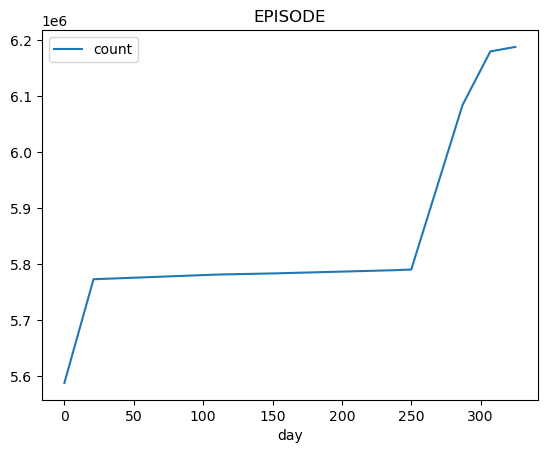

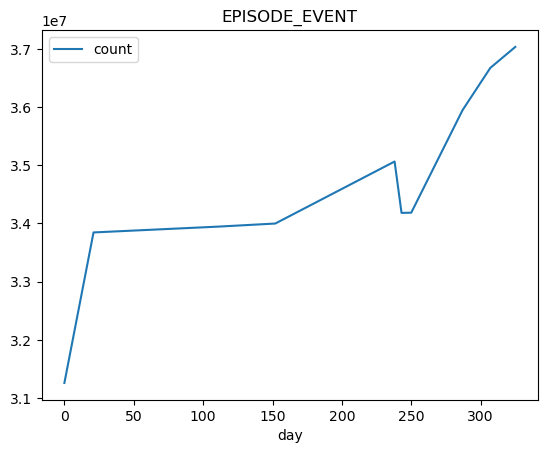

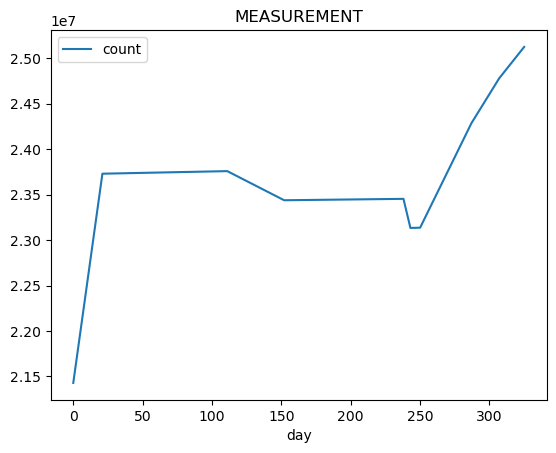

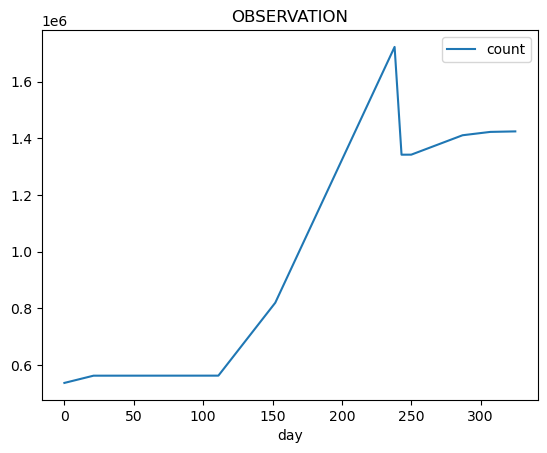

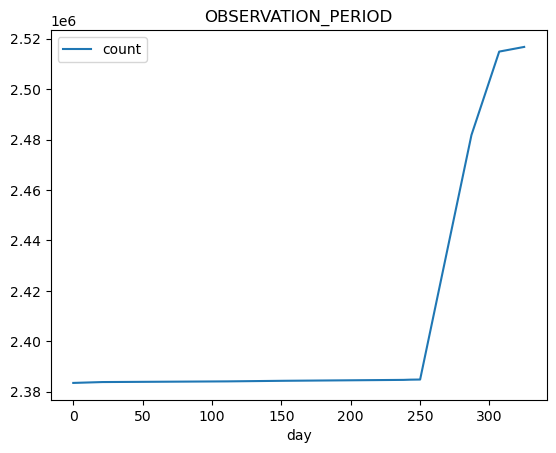

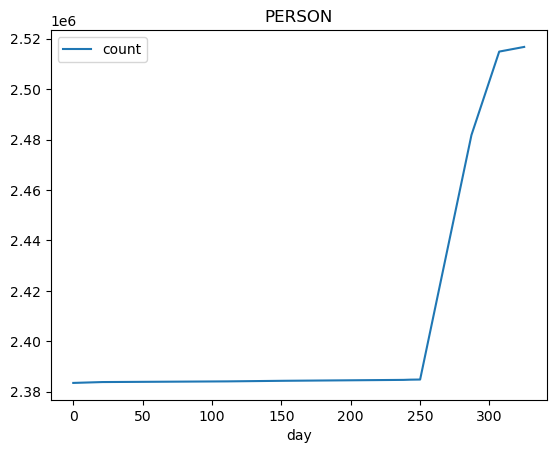

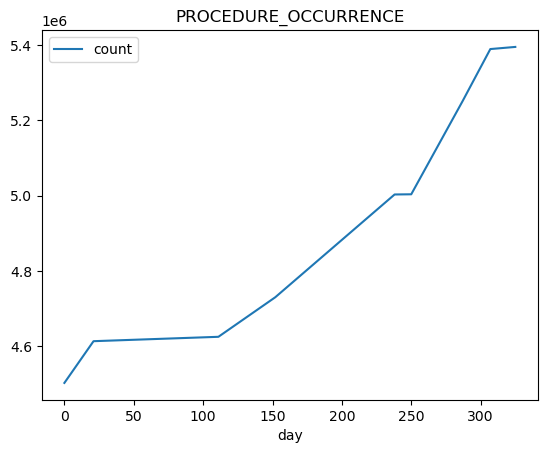

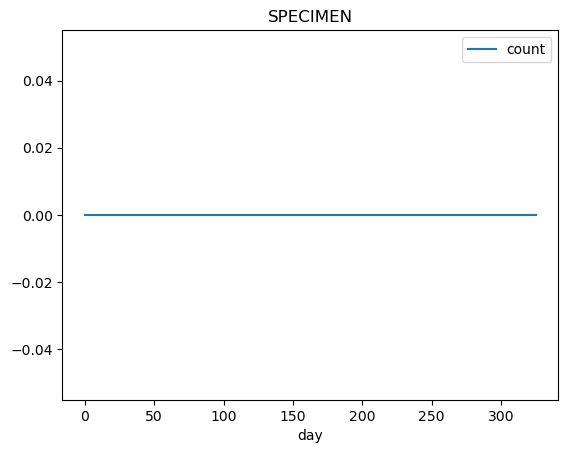

In [34]:
#Plotting one at a time
for title, group in vis_table_counts.groupby('TableName'):
    group.plot(x='day', y='count', title=title)
    plt.show()

### Summary statistics

In [16]:
#create new columns with the difference in count divided by the number of days between the exports
for column in all_table_counts_df:
    print(column)
    current_column_name = column
    #initialize column_a and last day nr to allow a calculation of differences
    if column == "count_20230331":
        column_a = all_table_counts_df[column]
        index_nr = all_table_counts_df.columns.get_loc(column) -1
        last_day_nr = difference_list[index_nr]
    #select only the relevant columns for the difference calculation
    elif column != "TableName" and "count_20230331":
        #print(all_table_counts_df[column]) #this works
        #select the contents of the column
        column_b = all_table_counts_df[column]
        #make sure the new column has an intuitive name
        new_column_name = current_column_name.replace('count_','diff_')
        #create the new column with the count difference
        all_table_counts_df[str(new_column_name)] = column_b - column_a
        #print(all_table_counts_df[str(new_column_name)])
        #select the index of the current column and match to the index of the difference in days
        index_nr = all_table_counts_df.columns.get_loc(column) -1
        #get the nr of days between the counts
        days_since_0 = difference_list[index_nr]
        days_between = days_since_0 - last_day_nr
        print(days_between)
        #divide the difference by the number of days between
        all_table_counts_df[str(new_column_name)] = all_table_counts_df[str(new_column_name)] / days_between
        #set the column we just looked at as the new column for the next comparison
        column_a = column_b
        last_day_nr = days_since_0
        

TableName
count_20230331
count_20230421
21
count_20230720
90
count_20230830
41
count_20231124
86
count_20231129
5
count_20231206
7
count_20240112
37
count_20240201
20
count_20240219
18


In [17]:
#inspect the new df with the columns containing the differences / number of days between most recent observation 
print(all_table_counts_df.shape)
all_table_counts_df #finally correct



(16, 20)


,TableName,count_20230331,count_20230421,count_20230720,count_20230830,count_20231124,count_20231129,count_20231206,count_20240112,count_20240201,count_20240219,diff_20230421,diff_20230720,diff_20230830,diff_20231124,diff_20231129,diff_20231206,diff_20240112,diff_20240201,diff_20240219
0,CDM_SOURCE,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
1,CONDITION_ERA,3719765,3750309,3752566,3753682,4197835,4052256,4052653,4256772,4336704,4341607,1454.476190,25.077778,27.219512,5164.569767,-29115.8,56.714286,5516.729730,3996.60,272.388889
2,CONDITION_OCCURRENCE,3773735,3815270,3817738,3818928,4264191,4080750,4081162,4286860,4367805,4372796,1977.857143,27.422222,29.024390,5177.476744,-36688.2,58.857143,5559.405405,4047.25,277.277778
3,DEATH,1473161,1473407,1473507,1473768,1474523,1474591,1474670,1490758,1495817,1496502,11.714286,1.111111,6.365854,8.779070,13.6,11.285714,434.810811,252.95,38.055556
4,DEVICE_EXPOSURE,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
5,DOSE_ERA,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
6,DRUG_ERA,803247,922244,926688,927747,932084,932467,932831,1036520,1041001,1044636,5666.523810,49.377778,25.829268,50.430233,76.6,52.000000,2802.405405,224.05,201.944444
7,DRUG_EXPOSURE,1104574,1245311,1304035,1314188,1318738,1319147,1319525,1440227,1445869,1450006,6701.761905,652.488889,247.634146,52.906977,81.8,54.000000,3262.216216,282.10,229.833333
8,EPISODE,5587312,5772838,5781263,5783305,5788997,5789538,5790109,6084669,6180422,6188456,8834.571429,93.611111,49.804878,66.186047,108.2,81.571429,7961.081081,4787.65,446.333333
9,EPISODE_EVENT,31259659,33846008,33946099,33998987,35064939,34181821,34185384,35948492,36674327,37034418,123159.476190,1112.122222,1289.951220,12394.790698,-176623.6,509.000000,47651.567568,36291.75,20005.055556


In [18]:
#select only the columns with differences for a new df
diff_table_counts_df = all_table_counts_df.iloc[:,11:21]

#include the table names for clarity
diff_table_counts_df["TableName"] = all_table_counts_df["TableName"]
diff_table_counts_df

#suddenly no negative differences anymore?

,diff_20230421,diff_20230720,diff_20230830,diff_20231124,diff_20231129,diff_20231206,diff_20240112,diff_20240201,diff_20240219,TableName
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,CDM_SOURCE
1,1454.476190,25.077778,27.219512,5164.569767,-29115.8,56.714286,5516.729730,3996.60,272.388889,CONDITION_ERA
2,1977.857143,27.422222,29.024390,5177.476744,-36688.2,58.857143,5559.405405,4047.25,277.277778,CONDITION_OCCURRENCE
3,11.714286,1.111111,6.365854,8.779070,13.6,11.285714,434.810811,252.95,38.055556,DEATH
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,DEVICE_EXPOSURE
5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,DOSE_ERA
6,5666.523810,49.377778,25.829268,50.430233,76.6,52.000000,2802.405405,224.05,201.944444,DRUG_ERA
7,6701.761905,652.488889,247.634146,52.906977,81.8,54.000000,3262.216216,282.10,229.833333,DRUG_EXPOSURE
8,8834.571429,93.611111,49.804878,66.186047,108.2,81.571429,7961.081081,4787.65,446.333333,EPISODE
9,123159.476190,1112.122222,1289.951220,12394.790698,-176623.6,509.000000,47651.567568,36291.75,20005.055556,EPISODE_EVENT


Conclusions: for CDM_SOURCE, DEVICE_EXPOSURE, DOSE_ERA and SPECIMEN, any change is suspicious

In [19]:
#transpose table to allow pandas statistics
diff_counts_per_table = diff_table_counts_df.transpose()

#turn table names into the column names
table_names = list(diff_table_counts_df["TableName"])
diff_counts_per_table = diff_counts_per_table.rename(columns = {0:table_names[0], 1:table_names[1], 2:table_names[2], 
                                                               3:table_names[3], 4:table_names[4], 5:table_names[5],
                                                               6:table_names[6], 7:table_names[7], 8:table_names[8],
                                                               9:table_names[9], 10:table_names[10], 11:table_names[11],
                                                               12:table_names[12], 13:table_names[13], 14:table_names[14],
                                                               15:table_names[15]})
diff_counts_per_table



,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20230421,0.0,1454.47619,1977.857143,11.714286,0.0,0.0,5666.52381,6701.761905,8834.571429,123159.47619,109593.904762,1216.238095,16.333333,16.333333,5273.190476,0.0
diff_20230720,0.0,25.077778,27.422222,1.111111,0.0,0.0,49.377778,652.488889,93.611111,1112.122222,314.411111,1.455556,3.0,3.0,129.2,0.0
diff_20230830,0.0,27.219512,29.02439,6.365854,0.0,0.0,25.829268,247.634146,49.804878,1289.95122,-7813.414634,6272.658537,5.682927,5.682927,2560.609756,0.0
diff_20231124,0.0,5164.569767,5177.476744,8.77907,0.0,0.0,50.430233,52.906977,66.186047,12394.790698,178.906977,10491.511628,4.151163,4.151163,3170.546512,0.0
diff_20231129,0.0,-29115.8,-36688.2,13.6,0.0,0.0,76.6,81.8,108.2,-176623.6,-63998.8,-76023.8,17.6,17.6,43.6,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.0,54.0,81.571429,509.0,382.285714,15.0,7.714286,7.714286,40.428571,0.0
diff_20240112,0.0,5516.72973,5559.405405,434.810811,0.0,0.0,2802.405405,3262.216216,7961.081081,47651.567568,31085.108108,1850.891892,2620.594595,2620.594595,6679.945946,0.0
diff_20240201,0.0,3996.6,4047.25,252.95,0.0,0.0,224.05,282.1,4787.65,36291.75,24672.8,589.65,1654.85,1654.85,6910.25,0.0
diff_20240219,0.0,272.388889,277.277778,38.055556,0.0,0.0,201.944444,229.833333,446.333333,20005.055556,19165.611111,99.166667,102.944444,102.944444,315.222222,0.0
TableName,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN


In [20]:
########   Obtain summary statistics   #########

#drop the row with TableNames
print(diff_counts_per_table.shape)
diff_counts_per_table = diff_counts_per_table[0:9]
#diff_counts_per_table.describe() #probably strings instead of floats
diff_counts_per_table = diff_counts_per_table.astype(float)
diff_counts_per_table.describe()


(10, 16)


,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
count,9.0,9.000000,9.000000,9.000000,9.0,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,0.0,-1400.224872,-2170.403242,86.519156,0.0,0.0,1016.573438,1284.971274,2492.112145,7310.012606,12620.090350,-6165.247514,492.541194,492.541194,2791.443720,0.0
std,0.0,10638.129093,13142.086564,153.170931,0.0,0.0,1961.102184,2272.861117,3685.913202,79079.060170,45657.623058,26439.096334,963.973887,963.973887,2889.183036,0.0
min,0.0,-29115.800000,-36688.200000,1.111111,0.0,0.0,25.829268,52.906977,49.804878,-176623.600000,-63998.800000,-76023.800000,3.000000,3.000000,40.428571,0.0
25%,0.0,27.219512,29.024390,8.779070,0.0,0.0,50.430233,81.800000,81.571429,1112.122222,178.906977,15.000000,5.682927,5.682927,129.200000,0.0
50%,0.0,272.388889,277.277778,11.714286,0.0,0.0,76.600000,247.634146,108.200000,12394.790698,382.285714,589.650000,16.333333,16.333333,2560.609756,0.0
75%,0.0,3996.600000,4047.250000,38.055556,0.0,0.0,224.050000,652.488889,4787.650000,36291.750000,24672.800000,1850.891892,102.944444,102.944444,5273.190476,0.0
max,0.0,5516.729730,5559.405405,434.810811,0.0,0.0,5666.523810,6701.761905,8834.571429,123159.476190,109593.904762,10491.511628,2620.594595,2620.594595,6910.250000,0.0


#### Confidence intervals per table

- Discussed the graphs and identified changes that were due to the ETL 
- Table specific preprocessing: removing the rows where the ETL changed in a way that influenced the table
- Calculated the 90% confidence interval for each table for safe range of change. 
- Determined in a discussion whether the 90% confidence interval was used or only a range with minimum of 0 (no negative change) and a maximum corresponding with one of the values where a change occurred.


In [21]:
#only considering periods with "normal change" (which means no changes were made to the ETL)
condition_era_occ = diff_counts_per_table.copy()
#drop rows with diff to april, no 24, nov 29, jan and both of feb
condition_era_occ = condition_era_occ.iloc[[1,2,5]]

condition_era_occ



,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20230720,0.0,25.077778,27.422222,1.111111,0.0,0.0,49.377778,652.488889,93.611111,1112.122222,314.411111,1.455556,3.000000,3.000000,129.200000,0.0
diff_20230830,0.0,27.219512,29.024390,6.365854,0.0,0.0,25.829268,247.634146,49.804878,1289.951220,-7813.414634,6272.658537,5.682927,5.682927,2560.609756,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,54.000000,81.571429,509.000000,382.285714,15.000000,7.714286,7.714286,40.428571,0.0


In [22]:
condition_era_occ.describe()

,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
count,3.0,3.000000,3.000000,3.000000,3.0,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,0.0,36.337192,38.434585,6.254226,0.0,0.0,42.402349,318.041012,74.995806,970.357814,-2372.239270,2096.371364,5.465738,5.465738,910.079443,0.0
std,0.0,17.679542,17.704587,5.088220,0.0,0.0,14.412469,305.393324,22.631297,409.321466,4712.318299,3616.777125,2.364635,2.364635,1430.090147,0.0
min,0.0,25.077778,27.422222,1.111111,0.0,0.0,25.829268,54.000000,49.804878,509.000000,-7813.414634,1.455556,3.000000,3.000000,40.428571,0.0
25%,0.0,26.148645,28.223306,3.738482,0.0,0.0,37.603523,150.817073,65.688153,810.561111,-3749.501762,8.227778,4.341463,4.341463,84.814286,0.0
50%,0.0,27.219512,29.024390,6.365854,0.0,0.0,49.377778,247.634146,81.571429,1112.122222,314.411111,15.000000,5.682927,5.682927,129.200000,0.0
75%,0.0,41.966899,43.940767,8.825784,0.0,0.0,50.688889,450.061518,87.591270,1201.036721,348.348413,3143.829268,6.698606,6.698606,1344.904878,0.0
max,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,652.488889,93.611111,1289.951220,382.285714,6272.658537,7.714286,7.714286,2560.609756,0.0


In [23]:
# Calculate the mean and standard error of the mean (SEM)
mean = condition_era_occ["CONDITION_ERA"].mean()
sem = stats.sem(condition_era_occ["CONDITION_ERA"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.95
degrees_freedom = len(condition_era_occ["CONDITION_ERA"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("95% Confidence Interval for column '{}':".format("CONDITION_ERA"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1])

95% Confidence Interval for column 'CONDITION_ERA':
Lower Bound: -7.5812262117317815
Upper Bound: 80.25561000318876


In [25]:
# Calculate the mean and standard error of the mean (SEM)
mean = condition_era_occ["CONDITION_OCCURRENCE"].mean()
sem = stats.sem(condition_era_occ["CONDITION_OCCURRENCE"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.95
degrees_freedom = len(condition_era_occ["CONDITION_OCCURRENCE"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("95% Confidence Interval for column '{}':".format("CONDITION_OCCURRENCE"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1])

95% Confidence Interval for column 'CONDITION_OCCURRENCE':
Lower Bound: -5.546045975555245
Upper Bound: 82.41521619106693


In [261]:
#only considering periods with "normal change" (which means no persons were added to the CDM)
death_analysis = diff_counts_per_table.copy()
#drop rows with differences in 2024
death_analysis = death_analysis.iloc[[0,1,2,3,4,5]]

death_analysis

,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20230421,0.0,1454.476190,1977.857143,11.714286,0.0,0.0,5666.523810,6701.761905,8834.571429,123159.476190,109593.904762,1216.238095,16.333333,16.333333,5273.190476,0.0
diff_20230720,0.0,25.077778,27.422222,1.111111,0.0,0.0,49.377778,652.488889,93.611111,1112.122222,314.411111,1.455556,3.000000,3.000000,129.200000,0.0
diff_20230830,0.0,27.219512,29.024390,6.365854,0.0,0.0,25.829268,247.634146,49.804878,1289.951220,-7813.414634,6272.658537,5.682927,5.682927,2560.609756,0.0
diff_20231124,0.0,5164.569767,5177.476744,8.779070,0.0,0.0,50.430233,52.906977,66.186047,12394.790698,178.906977,10491.511628,4.151163,4.151163,3170.546512,0.0
diff_20231129,0.0,-29115.800000,-36688.200000,13.600000,0.0,0.0,76.600000,81.800000,108.200000,-176623.600000,-63998.800000,-76023.800000,17.600000,17.600000,43.600000,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,54.000000,81.571429,509.000000,382.285714,15.000000,7.714286,7.714286,40.428571,0.0


In [1]:
# Calculate the mean and standard error of the mean (SEM)
mean = death_analysis["DEATH"].mean()
sem = stats.sem(death_analysis["DEATH"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.95
degrees_freedom = len(death_analysis["DEATH"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("95% Confidence Interval for column '{}':".format("DEATH"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1])

NameError: name 'death_analysis' is not defined

In [26]:
#only considering periods with no ETL changes (that would be of influence)
drug_analysis = diff_counts_per_table.copy()
#drop rows with differences in 2024
#drug_analysis = drug_analysis.iloc[[1,2,3,4,5]]
drug_analysis = drug_analysis.iloc[[3,4,5]]

drug_analysis

,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20231124,0.0,5164.569767,5177.476744,8.779070,0.0,0.0,50.430233,52.906977,66.186047,12394.790698,178.906977,10491.511628,4.151163,4.151163,3170.546512,0.0
diff_20231129,0.0,-29115.800000,-36688.200000,13.600000,0.0,0.0,76.600000,81.800000,108.200000,-176623.600000,-63998.800000,-76023.800000,17.600000,17.600000,43.600000,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,54.000000,81.571429,509.000000,382.285714,15.000000,7.714286,7.714286,40.428571,0.0


In [27]:
# Calculate the mean and standard error of the mean (SEM)
mean = drug_analysis["DRUG_ERA"].mean()
sem = stats.sem(drug_analysis["DRUG_ERA"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.85
degrees_freedom = len(drug_analysis["DRUG_ERA"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("85% Confidence Interval for column '{}':".format("DRUG_ERA"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1])

85% Confidence Interval for column 'DRUG_ERA':
Lower Bound: 40.34022742786209
Upper Bound: 79.01326094423094


In [30]:
#removing the first two that are still included
#drug_analysis = drug_analysis.iloc[[2,3,4]]

# Calculate the mean and standard error of the mean (SEM)
mean = drug_analysis["DRUG_EXPOSURE"].mean()
sem = stats.sem(drug_analysis["DRUG_EXPOSURE"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.95
degrees_freedom = len(drug_analysis["DRUG_EXPOSURE"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("95% Confidence Interval for column '{}':".format("DRUG_EXPOSURE"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1])

95% Confidence Interval for column 'DRUG_EXPOSURE':
Lower Bound: 22.224599086590622
Upper Bound: 103.58005207620008


In [280]:
#only considering periods with no ETL changes (that would be of influence)
episode_analysis = diff_counts_per_table.copy()
#drop rows with differences in 2024
episode_analysis = episode_analysis.iloc[[1,2,3,4,5]]
episode_analysis


,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20230720,0.0,25.077778,27.422222,1.111111,0.0,0.0,49.377778,652.488889,93.611111,1112.122222,314.411111,1.455556,3.000000,3.000000,129.200000,0.0
diff_20230830,0.0,27.219512,29.024390,6.365854,0.0,0.0,25.829268,247.634146,49.804878,1289.951220,-7813.414634,6272.658537,5.682927,5.682927,2560.609756,0.0
diff_20231124,0.0,5164.569767,5177.476744,8.779070,0.0,0.0,50.430233,52.906977,66.186047,12394.790698,178.906977,10491.511628,4.151163,4.151163,3170.546512,0.0
diff_20231129,0.0,-29115.800000,-36688.200000,13.600000,0.0,0.0,76.600000,81.800000,108.200000,-176623.600000,-63998.800000,-76023.800000,17.600000,17.600000,43.600000,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,54.000000,81.571429,509.000000,382.285714,15.000000,7.714286,7.714286,40.428571,0.0


In [281]:
# Calculate the mean and standard error of the mean (SEM)
mean = episode_analysis["EPISODE"].mean()
sem = stats.sem(episode_analysis["EPISODE"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.99
degrees_freedom = len(episode_analysis["EPISODE"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("99% Confidence Interval for column '{}':".format("EPISODE"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1])

99% Confidence Interval for column 'EPISODE':
Lower Bound: 32.86032434519198
Upper Bound: 126.88906135198724


In [282]:
#only considering periods with no ETL changes (that would be of influence)
episode_event = diff_counts_per_table.copy()
#drop rows with differences in 2024
episode_event = episode_event.iloc[[1,5]]
episode_event

,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20230720,0.0,25.077778,27.422222,1.111111,0.0,0.0,49.377778,652.488889,93.611111,1112.122222,314.411111,1.455556,3.000000,3.000000,129.200000,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,54.000000,81.571429,509.000000,382.285714,15.000000,7.714286,7.714286,40.428571,0.0


In [294]:
# Calculate the mean and standard error of the mean (SEM)
mean = episode_event["EPISODE_EVENT"].mean()
sem = stats.sem(episode_event["EPISODE_EVENT"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.60
degrees_freedom = len(episode_event["EPISODE_EVENT"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("60% Confidence Interval for column '{}':".format("EPISODE_EVENT"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1]) # 1289.951220 should be flagged already

60% Confidence Interval for column 'EPISODE_EVENT':
Lower Bound: 395.4978498541627
Upper Bound: 1225.6243723680598


In [31]:
#continue with measurement
#diff_counts_per_table["MEASUREMENT"]

#only considering periods with no ETL changes (that would be of influence)
measurement_stable = diff_counts_per_table.copy()
#drop rows with differences in 2024
measurement_stable = measurement_stable.iloc[[1, 3, 5]]
measurement_stable


,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20230720,0.0,25.077778,27.422222,1.111111,0.0,0.0,49.377778,652.488889,93.611111,1112.122222,314.411111,1.455556,3.000000,3.000000,129.200000,0.0
diff_20231124,0.0,5164.569767,5177.476744,8.779070,0.0,0.0,50.430233,52.906977,66.186047,12394.790698,178.906977,10491.511628,4.151163,4.151163,3170.546512,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,54.000000,81.571429,509.000000,382.285714,15.000000,7.714286,7.714286,40.428571,0.0


In [34]:
# Calculate the mean and standard error of the mean (SEM)
mean = measurement_stable["MEASUREMENT"].mean()
sem = stats.sem(measurement_stable["MEASUREMENT"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.95
degrees_freedom = len(measurement_stable["MEASUREMENT"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("95% Confidence Interval for column '{}':".format("MEASUREMENT"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1]) 

95% Confidence Interval for column 'MEASUREMENT':
Lower Bound: 34.644214255296106
Upper Bound: 549.0916538387114


In [43]:
#continue with observation
#diff_counts_per_table["OBSERVATION"]

#only considering periods with no ETL changes (that would be of influence)
obsv_stable = diff_counts_per_table.copy()
obsv_stable = obsv_stable.iloc[[1, 5]]
obsv_stable

,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20230720,0.0,25.077778,27.422222,1.111111,0.0,0.0,49.377778,652.488889,93.611111,1112.122222,314.411111,1.455556,3.000000,3.000000,129.200000,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,54.000000,81.571429,509.000000,382.285714,15.000000,7.714286,7.714286,40.428571,0.0


In [70]:
# Calculate the mean and standard error of the mean (SEM)
mean = obsv_stable["OBSERVATION"].mean()
sem = stats.sem(obsv_stable["OBSERVATION"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.90
degrees_freedom = len(obsv_stable["OBSERVATION"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("90% Confidence Interval for column '{}':".format("OBSERVATION"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1]) 

90% Confidence Interval for column 'OBSERVATION':
Lower Bound: -34.53035053634636
Upper Bound: 50.98590609190187


In [72]:
#only considering periods with no ETL changes (that would be of influence)
obsv_period = diff_counts_per_table.copy()
obsv_period = obsv_period.iloc[[0,1,2,3,4,5]]
obsv_period

,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20230421,0.0,1454.476190,1977.857143,11.714286,0.0,0.0,5666.523810,6701.761905,8834.571429,123159.476190,109593.904762,1216.238095,16.333333,16.333333,5273.190476,0.0
diff_20230720,0.0,25.077778,27.422222,1.111111,0.0,0.0,49.377778,652.488889,93.611111,1112.122222,314.411111,1.455556,3.000000,3.000000,129.200000,0.0
diff_20230830,0.0,27.219512,29.024390,6.365854,0.0,0.0,25.829268,247.634146,49.804878,1289.951220,-7813.414634,6272.658537,5.682927,5.682927,2560.609756,0.0
diff_20231124,0.0,5164.569767,5177.476744,8.779070,0.0,0.0,50.430233,52.906977,66.186047,12394.790698,178.906977,10491.511628,4.151163,4.151163,3170.546512,0.0
diff_20231129,0.0,-29115.800000,-36688.200000,13.600000,0.0,0.0,76.600000,81.800000,108.200000,-176623.600000,-63998.800000,-76023.800000,17.600000,17.600000,43.600000,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,54.000000,81.571429,509.000000,382.285714,15.000000,7.714286,7.714286,40.428571,0.0


In [75]:
# Calculate the mean and standard error of the mean (SEM)
mean = obsv_period["OBSERVATION_PERIOD"].mean()
sem = stats.sem(obsv_period["OBSERVATION_PERIOD"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.99
degrees_freedom = len(obsv_period["OBSERVATION_PERIOD"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("99% Confidence Interval for column '{}':".format("OBSERVATION_PERIOD"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1]) 

99% Confidence Interval for column 'OBSERVATION_PERIOD':
Lower Bound: -1.3271848071993073
Upper Bound: 19.48775436306098


In [77]:
#only considering periods with no ETL changes (that would be of influence)
person_stable = diff_counts_per_table.copy()
person_stable = person_stable.iloc[[0,1,2,3,4,5]]
person_stable

,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20230421,0.0,1454.476190,1977.857143,11.714286,0.0,0.0,5666.523810,6701.761905,8834.571429,123159.476190,109593.904762,1216.238095,16.333333,16.333333,5273.190476,0.0
diff_20230720,0.0,25.077778,27.422222,1.111111,0.0,0.0,49.377778,652.488889,93.611111,1112.122222,314.411111,1.455556,3.000000,3.000000,129.200000,0.0
diff_20230830,0.0,27.219512,29.024390,6.365854,0.0,0.0,25.829268,247.634146,49.804878,1289.951220,-7813.414634,6272.658537,5.682927,5.682927,2560.609756,0.0
diff_20231124,0.0,5164.569767,5177.476744,8.779070,0.0,0.0,50.430233,52.906977,66.186047,12394.790698,178.906977,10491.511628,4.151163,4.151163,3170.546512,0.0
diff_20231129,0.0,-29115.800000,-36688.200000,13.600000,0.0,0.0,76.600000,81.800000,108.200000,-176623.600000,-63998.800000,-76023.800000,17.600000,17.600000,43.600000,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,54.000000,81.571429,509.000000,382.285714,15.000000,7.714286,7.714286,40.428571,0.0


In [80]:
# Calculate the mean and standard error of the mean (SEM)
mean = person_stable["PERSON"].mean()
sem = stats.sem(person_stable["PERSON"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.99
degrees_freedom = len(person_stable["PERSON"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("99% Confidence Interval for column '{}':".format("PERSON"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1]) 

99% Confidence Interval for column 'PERSON':
Lower Bound: -1.3271848071993073
Upper Bound: 19.48775436306098


In [102]:
#continue with procedure occurrence
diff_counts_per_table["PROCEDURE_OCCURRENCE"]

#only considering periods with no ETL changes (that would be of influence)
pro_occ_stable = diff_counts_per_table.copy()
pro_occ_stable = pro_occ_stable.iloc[[1,4,5]]
pro_occ_stable

,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20230720,0.0,25.077778,27.422222,1.111111,0.0,0.0,49.377778,652.488889,93.611111,1112.122222,314.411111,1.455556,3.000000,3.000000,129.200000,0.0
diff_20231129,0.0,-29115.800000,-36688.200000,13.600000,0.0,0.0,76.600000,81.800000,108.200000,-176623.600000,-63998.800000,-76023.800000,17.600000,17.600000,43.600000,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,54.000000,81.571429,509.000000,382.285714,15.000000,7.714286,7.714286,40.428571,0.0


In [105]:
# Calculate the mean and standard error of the mean (SEM)
mean = pro_occ_stable["PROCEDURE_OCCURRENCE"].mean()
sem = stats.sem(pro_occ_stable["PROCEDURE_OCCURRENCE"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.90
degrees_freedom = len(pro_occ_stable["PROCEDURE_OCCURRENCE"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("90% Confidence Interval for column '{}':".format("PROCEDURE_OCCURRENCE"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1]) 

90% Confidence Interval for column 'PROCEDURE_OCCURRENCE':
Lower Bound: -13.82624901772185
Upper Bound: 155.9786299701027


#### Suspicous change 

In [24]:
diff_counts_per_table

,CDM_SOURCE,CONDITION_ERA,CONDITION_OCCURRENCE,DEATH,DEVICE_EXPOSURE,DOSE_ERA,DRUG_ERA,DRUG_EXPOSURE,EPISODE,EPISODE_EVENT,MEASUREMENT,OBSERVATION,OBSERVATION_PERIOD,PERSON,PROCEDURE_OCCURRENCE,SPECIMEN
diff_20230421,0.0,1454.476190,1977.857143,11.714286,0.0,0.0,5666.523810,6701.761905,8834.571429,123159.476190,109593.904762,1216.238095,16.333333,16.333333,5273.190476,0.0
diff_20230720,0.0,25.077778,27.422222,1.111111,0.0,0.0,49.377778,652.488889,93.611111,1112.122222,314.411111,1.455556,3.000000,3.000000,129.200000,0.0
diff_20230830,0.0,27.219512,29.024390,6.365854,0.0,0.0,25.829268,247.634146,49.804878,1289.951220,-7813.414634,6272.658537,5.682927,5.682927,2560.609756,0.0
diff_20231124,0.0,5164.569767,5177.476744,8.779070,0.0,0.0,50.430233,52.906977,66.186047,12394.790698,178.906977,10491.511628,4.151163,4.151163,3170.546512,0.0
diff_20231129,0.0,-29115.800000,-36688.200000,13.600000,0.0,0.0,76.600000,81.800000,108.200000,-176623.600000,-63998.800000,-76023.800000,17.600000,17.600000,43.600000,0.0
diff_20231206,0.0,56.714286,58.857143,11.285714,0.0,0.0,52.000000,54.000000,81.571429,509.000000,382.285714,15.000000,7.714286,7.714286,40.428571,0.0
diff_20240112,0.0,5516.729730,5559.405405,434.810811,0.0,0.0,2802.405405,3262.216216,7961.081081,47651.567568,31085.108108,1850.891892,2620.594595,2620.594595,6679.945946,0.0
diff_20240201,0.0,3996.600000,4047.250000,252.950000,0.0,0.0,224.050000,282.100000,4787.650000,36291.750000,24672.800000,589.650000,1654.850000,1654.850000,6910.250000,0.0
diff_20240219,0.0,272.388889,277.277778,38.055556,0.0,0.0,201.944444,229.833333,446.333333,20005.055556,19165.611111,99.166667,102.944444,102.944444,315.222222,0.0


In [34]:
#only considering periods with ETL changes
episode_sus = diff_counts_per_table.copy()
#remove the minus as well, since we have a separate guard for that
episode_sus = episode_sus.iloc[[0,2,3,6,7,8]] #1112 & 509 fall outside
episode_sus

# Calculate the mean and standard error of the mean (SEM)
mean = episode_sus["EPISODE_EVENT"].mean()
sem = stats.sem(episode_sus["EPISODE_EVENT"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.95
degrees_freedom = len(episode_sus["EPISODE_EVENT"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("95% Confidence Interval for column '{}':".format("EPISODE_EVENT"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1]) # 1289.951220 should be flagged already

95% Confidence Interval for column 'EPISODE_EVENT':
Lower Bound: -5966.694958535307
Upper Bound: 86230.89203546394


In [33]:
#considering periods with ETL changes (that would be of influence)
obsv_sus = diff_counts_per_table.copy()
#negative change removed as well since we want the upper range of suspicious increase
obsv_sus = obsv_sus.iloc[[0,2,3,6,7,8]]
obsv_sus

# Calculate the mean and standard error of the mean (SEM)
mean = obsv_sus["OBSERVATION"].mean()
sem = stats.sem(obsv_sus["OBSERVATION"])

# Calculate the confidence interval using the t-distribution
confidence_level = 0.90
degrees_freedom = len(obsv_sus["OBSERVATION"]) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean, scale=sem)

print("90% Confidence Interval for column '{}':".format("OBSERVATION"))
print("Lower Bound:", confidence_interval[0])
print("Upper Bound:", confidence_interval[1]) 

90% Confidence Interval for column 'OBSERVATION':
Lower Bound: 38.14992509024569
Upper Bound: 6801.889014339419


## Concept counts analysis

In [85]:
march23_concept_counts_df

,CountsID,TableName,ConceptID,ConceptName,ValueConceptID,ValueConceptName,Count
0,1,CONDITION_OCCURRENCE,0,No matching concept,NaN,NaN,12191
1,2,CONDITION_OCCURRENCE,24296,Primary malignant neoplasm of pituitary gland,NaN,NaN,2
2,3,CONDITION_OCCURRENCE,25486,Primary malignant neoplasm of islets of Langer...,NaN,NaN,64
3,4,CONDITION_OCCURRENCE,26052,Primary malignant neoplasm of larynx,NaN,NaN,28
4,5,CONDITION_OCCURRENCE,26361,Primary malignant neoplasm of pineal gland,NaN,NaN,5
...,...,...,...,...,...,...,...
24573,24574,PROCEDURE_OCCURRENCE,46271079,Transplantation of autologous hematopoietic st...,NaN,NaN,70
24574,24575,PROCEDURE_OCCURRENCE,46272428,Ultrasonography guided puncture and aspiration,NaN,NaN,87145
24575,24576,PROCEDURE_OCCURRENCE,46272861,Radiotherapy to thorax,NaN,NaN,92
24576,24577,PROCEDURE_OCCURRENCE,46272913,Robotic assisted surgery,NaN,NaN,11


In [66]:
#checking for duplicates
ids = march23_concept_counts_df["ConceptID"] #lots of duplicates of conceptID: values or tables are different
march23_concept_counts_df[ids.isin(ids[ids.duplicated()])].sort_values("ConceptID") 

,CountsID,TableName,ConceptID,ConceptName,ValueConceptID,ValueConceptName,Count
0,1,CONDITION_OCCURRENCE,0,No matching concept,NaN,NaN,12191
23082,23083,MEASUREMENT,0,No matching concept,NaN,NaN,90836
24229,24230,PROCEDURE_OCCURRENCE,0,No matching concept,NaN,NaN,171324
11277,11278,DRUG_EXPOSURE,0,No matching concept,NaN,NaN,18624
11879,11880,EPISODE,32531,Treatment Regimen,35807089.0,ABV (Vinblastine),86
...,...,...,...,...,...,...,...
24224,24225,OBSERVATION,2147483500,"SCQ Question 11P: Osteoarthritis, degenerative...",45878245.0,No,5184
24225,24226,OBSERVATION,2147483501,"SCQ Question 11B: Osteoarthritis, degenerative...",45877994.0,Yes,660
24226,24227,OBSERVATION,2147483501,"SCQ Question 11B: Osteoarthritis, degenerative...",45878245.0,No,1323
24227,24228,OBSERVATION,2147483502,"SCQ Question 11H: Osteoarthritis, degenerative...",45877994.0,Yes,1269


In [80]:
#function to clean a concept counts df
def clean_concept_counts(df):
    #get the name of the df and drop _concept_counts_df
    name_date = df.name
    count_date = name_date.replace('concept_','count_')
    
    #drop irrelevant and duplicate columns #CHANGE
    clean_df = df.drop(columns = ["CountsID"])
    #clean_df = df.drop(columns = ["CountsID", "TableName", "ConceptName", "ValueConceptID", "ValueConceptName"])
    
    #rename count columns for clarity
    clean_df = clean_df.rename(columns = {"Count":str(count_date)})
    #clean_df = df.rename(columns = {"Count":str(count_date)})
    
    return clean_df


In [81]:
#ALTER names of dfs and the function (concept counts instead of table)
#apply to all dfs
march23_concept_clean  = clean_concept_counts(march23_concept_counts_df)
apr23_concept_clean = clean_concept_counts(apr23_concept_counts_df)
jul23_concept_clean = clean_concept_counts(jul23_concept_counts_df)
aug23_concept_clean = clean_concept_counts(aug23_concept_counts_df)
nov2324_concept_clean = clean_concept_counts(nov2324_concept_counts_df)
nov2329_concept_clean = clean_concept_counts(nov2329_concept_counts_df)
dec23_concept_clean = clean_concept_counts(dec23_concept_counts_df)
jan24_concept_clean = clean_concept_counts(jan24_concept_counts_df)
feb2401_concept_clean = clean_concept_counts(feb2401_concept_counts_df)
feb2419_concept_clean = clean_concept_counts(feb2419_concept_counts_df) 

In [65]:
#march23_concept_clean
#ids = march23_concept_clean["ConceptID"]
#march23_concept_clean[ids.isin(ids[ids.duplicated()])].sort_values("ConceptID") #lots of duplicates
ids = apr23_concept_clean["ConceptID"]
apr23_concept_clean[ids.isin(ids[ids.duplicated()])].sort_values("ConceptID") #lots of duplicates, same ones as march
#apr23_concept_clean
#feb2419_concept_clean #24417 rows
#concept_counts_df_1.head(10) #there are a lot of rows for conceptID 0 only 
#many to many join instead of one to many... Are there duplicated ConceptIDs? Doesn't look like it

,ConceptID,count_20230421
0,0,12203
23117,0,90917
24282,0,177363
11278,0,18962
11907,32531,191
...,...,...
24277,2147483500,5184
24278,2147483501,660
24279,2147483501,1323
24280,2147483502,1269


In [179]:
#combine all dataframes for concept counts
#CountsID	TableName	ConceptID	ConceptName	ValueConceptID	ValueConceptName	Count
concept_counts_df_1 = pd.merge(march23_concept_clean, apr23_concept_clean, on = ["TableName", "ConceptID", 
                                                                                "ConceptName", "ValueConceptID", 
                                                                                 "ValueConceptName"], how = "inner") 
#concept_counts_df_1 = pd.merge(march23_concept_clean, apr23_concept_clean,  on = "ConceptID",  how = "inner") 
concept_counts_df_2 = pd.merge(concept_counts_df_1, jul23_concept_clean, on = ["TableName", "ConceptID", 
                                                                               "ConceptName", "ValueConceptID", 
                                                                               "ValueConceptName"], how = "inner") 

concept_counts_df_3 = pd.merge(concept_counts_df_2, aug23_concept_clean, on = ["TableName", "ConceptID", 
                                                                               "ConceptName", "ValueConceptID", 
                                                                               "ValueConceptName"], how = "inner") 
concept_counts_df_4 = pd.merge(concept_counts_df_3, nov2324_concept_clean, on = ["TableName", "ConceptID", 
                                                                                "ConceptName", "ValueConceptID", 
                                                                                 "ValueConceptName"], how = "inner") 
concept_counts_df_5 = pd.merge(concept_counts_df_4, nov2329_concept_clean, on = ["TableName", "ConceptID", 
                                                                                 "ConceptName", "ValueConceptID", 
                                                                                 "ValueConceptName"], how = "inner") 
concept_counts_df_6 = pd.merge(concept_counts_df_5, dec23_concept_clean, on = ["TableName", "ConceptID", 
                                                                               "ConceptName", "ValueConceptID", 
                                                                               "ValueConceptName"], how = "inner") 
concept_counts_df_7 = pd.merge(concept_counts_df_6, jan24_concept_clean, on = ["TableName", "ConceptID", 
                                                                               "ConceptName", "ValueConceptID", 
                                                                               "ValueConceptName"], how = "inner") 
concept_counts_df_8 = pd.merge(concept_counts_df_7, feb2401_concept_clean ,on = ["TableName", "ConceptID", 
                                                                                 "ConceptName", "ValueConceptID", 
                                                                                 "ValueConceptName"], how = "inner") 
all_concept_counts_df = pd.merge(concept_counts_df_8, feb2419_concept_clean, on = ["TableName", "ConceptID", 
                                                                                   "ConceptName", "ValueConceptID", 
                                                                                   "ValueConceptName"], how = "inner") 

In [180]:
#concept_counts_df_2
all_concept_counts_df 

,TableName,ConceptID,ConceptName,ValueConceptID,ValueConceptName,count_20230331,count_20230421,count_20230720,count_20230830,count_20231124,count_20231129,count_20231206,count_20240112,count_20240201,count_20240219
0,CONDITION_OCCURRENCE,0,No matching concept,NaN,NaN,12191,12203,12229,12260,11837,12660,13081,14563,14635,14646
1,CONDITION_OCCURRENCE,24296,Primary malignant neoplasm of pituitary gland,NaN,NaN,2,2,2,2,2,2,2,2,2,2
2,CONDITION_OCCURRENCE,25486,Primary malignant neoplasm of islets of Langer...,NaN,NaN,64,64,63,63,65,65,65,66,66,66
3,CONDITION_OCCURRENCE,26052,Primary malignant neoplasm of larynx,NaN,NaN,28,28,27,27,28,28,28,32,33,32
4,CONDITION_OCCURRENCE,26361,Primary malignant neoplasm of pineal gland,NaN,NaN,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,PROCEDURE_OCCURRENCE,46271079,Transplantation of autologous hematopoietic st...,NaN,NaN,70,73,73,73,73,73,73,74,74,74
23693,PROCEDURE_OCCURRENCE,46272428,Ultrasonography guided puncture and aspiration,NaN,NaN,87145,87147,87185,87185,87183,87183,87183,87184,98019,98019
23694,PROCEDURE_OCCURRENCE,46272861,Radiotherapy to thorax,NaN,NaN,92,140,141,141,142,142,142,154,154,154
23695,PROCEDURE_OCCURRENCE,46272913,Robotic assisted surgery,NaN,NaN,11,11,11,11,11,11,11,11,11,11


Concepts are not the same in all result sets, e.g. March version has 24578 rows, the combined version had 23697 rows.
March = 24578
April = 24632 -> increase of about 50
July = 24655 -> small increase
August = 24660 -> tiny increase
Nov 24th = 25338 -> increase of 600+
Nov 29th = 24847 -> decrease of about 500 after vocab update
Dec 23 = 24245 -> decrease of about 600 ?
Jan 24 = 24244 -> decrease of 1
Feb 1st = 24414 -> increase of about 150
Feb 19th = 24417 -> increase of 3

In [94]:
feb2419_concept_counts_df

,CountsID,TableName,ConceptID,ConceptName,ValueConceptID,ValueConceptName,Count
0,1,CONDITION_OCCURRENCE,0,No matching concept,NaN,NaN,14646
1,2,CONDITION_OCCURRENCE,24296,Primary malignant neoplasm of pituitary gland,NaN,NaN,2
2,3,CONDITION_OCCURRENCE,25486,Primary malignant neoplasm of islets of Langer...,NaN,NaN,66
3,4,CONDITION_OCCURRENCE,26052,Primary malignant neoplasm of larynx,NaN,NaN,32
4,5,CONDITION_OCCURRENCE,26361,Primary malignant neoplasm of pineal gland,NaN,NaN,5
...,...,...,...,...,...,...,...
24412,24413,PROCEDURE_OCCURRENCE,46271079,Transplantation of autologous hematopoietic st...,NaN,NaN,74
24413,24414,PROCEDURE_OCCURRENCE,46272428,Ultrasonography guided puncture and aspiration,NaN,NaN,98019
24414,24415,PROCEDURE_OCCURRENCE,46272861,Radiotherapy to thorax,NaN,NaN,154
24415,24416,PROCEDURE_OCCURRENCE,46272913,Robotic assisted surgery,NaN,NaN,11


In [ ]:
#run analysis on the increases between concept counts that were in all result dfs

In [181]:
non_count_columns = ["TableName", "ConceptID", "ConceptName", "ValueConceptID", "ValueConceptName", "count_20230331"]

#create new columns with the difference in count divided by the number of days between the exports
for column in all_concept_counts_df:
    print(column)
    current_column_name = column
    #initialize column_a and last day nr to allow a calculation of differences
    if column == "count_20230331":
        column_a = all_concept_counts_df[column]
        #the index can be obtained using -5 because there are 5 columns that do not contain counts
        index_nr = all_concept_counts_df.columns.get_loc(column) - 5
        last_day_nr = difference_list[index_nr]
    #select only the relevant columns for the difference calculation
    elif column not in non_count_columns:
        #select the contents of the column
        column_b = all_concept_counts_df[column]
        #make sure the new column has an intuitive name
        new_column_name = current_column_name.replace('count_','diff_')
        #create the new column with the count difference
        all_concept_counts_df[str(new_column_name)] = column_b - column_a
        #select the index of the current column and match to the index of the difference in days
        index_nr = all_concept_counts_df.columns.get_loc(column) -5
        #get the nr of days between the counts
        days_since_0 = difference_list[index_nr]
        days_between = days_since_0 - last_day_nr
        print(days_between)
        #divide the difference by the number of days between
        all_concept_counts_df[str(new_column_name)] = all_concept_counts_df[str(new_column_name)] / days_between
        #set the column we just looked at as the new column for the next comparison
        column_a = column_b
        last_day_nr = days_since_0
        

TableName
ConceptID
ConceptName
ValueConceptID
ValueConceptName
count_20230331
count_20230421
21
count_20230720
90
count_20230830
41
count_20231124
86
count_20231129
5
count_20231206
7
count_20240112
37
count_20240201
20
count_20240219
18


In [182]:
all_concept_counts_df

,TableName,ConceptID,ConceptName,ValueConceptID,ValueConceptName,count_20230331,count_20230421,count_20230720,count_20230830,count_20231124,...,count_20240219,diff_20230421,diff_20230720,diff_20230830,diff_20231124,diff_20231129,diff_20231206,diff_20240112,diff_20240201,diff_20240219
0,CONDITION_OCCURRENCE,0,No matching concept,NaN,NaN,12191,12203,12229,12260,11837,...,14646,0.571429,0.288889,0.756098,-4.918605,164.6,60.142857,40.054054,3.60,0.611111
1,CONDITION_OCCURRENCE,24296,Primary malignant neoplasm of pituitary gland,NaN,NaN,2,2,2,2,2,...,2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
2,CONDITION_OCCURRENCE,25486,Primary malignant neoplasm of islets of Langer...,NaN,NaN,64,64,63,63,65,...,66,0.000000,-0.011111,0.000000,0.023256,0.0,0.000000,0.027027,0.00,0.000000
3,CONDITION_OCCURRENCE,26052,Primary malignant neoplasm of larynx,NaN,NaN,28,28,27,27,28,...,32,0.000000,-0.011111,0.000000,0.011628,0.0,0.000000,0.108108,0.05,-0.055556
4,CONDITION_OCCURRENCE,26361,Primary malignant neoplasm of pineal gland,NaN,NaN,5,5,5,5,5,...,5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,PROCEDURE_OCCURRENCE,46271079,Transplantation of autologous hematopoietic st...,NaN,NaN,70,73,73,73,73,...,74,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.027027,0.00,0.000000
23693,PROCEDURE_OCCURRENCE,46272428,Ultrasonography guided puncture and aspiration,NaN,NaN,87145,87147,87185,87185,87183,...,98019,0.095238,0.422222,0.000000,-0.023256,0.0,0.000000,0.027027,541.75,0.000000
23694,PROCEDURE_OCCURRENCE,46272861,Radiotherapy to thorax,NaN,NaN,92,140,141,141,142,...,154,2.285714,0.011111,0.000000,0.011628,0.0,0.000000,0.324324,0.00,0.000000
23695,PROCEDURE_OCCURRENCE,46272913,Robotic assisted surgery,NaN,NaN,11,11,11,11,11,...,11,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000


In [185]:
print(all_concept_counts_df.shape)

#select only the columns with differences for a new df (last 9 columns)
diff_concept_counts_df = all_concept_counts_df.iloc[:,15:25]

#include the ConceptName and ID for clarity
diff_concept_counts_df["ConceptName"] = all_concept_counts_df["ConceptName"]
diff_concept_counts_df["ConceptID"] = all_concept_counts_df["ConceptID"]
diff_concept_counts_df

#there are still negative differences here

(23697, 24)


,diff_20230421,diff_20230720,diff_20230830,diff_20231124,diff_20231129,diff_20231206,diff_20240112,diff_20240201,diff_20240219,ConceptName,ConceptID
0,0.571429,0.288889,0.756098,-4.918605,164.6,60.142857,40.054054,3.60,0.611111,No matching concept,0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,Primary malignant neoplasm of pituitary gland,24296
2,0.000000,-0.011111,0.000000,0.023256,0.0,0.000000,0.027027,0.00,0.000000,Primary malignant neoplasm of islets of Langer...,25486
3,0.000000,-0.011111,0.000000,0.011628,0.0,0.000000,0.108108,0.05,-0.055556,Primary malignant neoplasm of larynx,26052
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,Primary malignant neoplasm of pineal gland,26361
...,...,...,...,...,...,...,...,...,...,...,...
23692,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.027027,0.00,0.000000,Transplantation of autologous hematopoietic st...,46271079
23693,0.095238,0.422222,0.000000,-0.023256,0.0,0.000000,0.027027,541.75,0.000000,Ultrasonography guided puncture and aspiration,46272428
23694,2.285714,0.011111,0.000000,0.011628,0.0,0.000000,0.324324,0.00,0.000000,Radiotherapy to thorax,46272861
23695,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,Robotic assisted surgery,46272913


In [186]:
#transpose table to allow pandas statistics
diff_counts_per_concept = diff_concept_counts_df.transpose()
diff_counts_per_concept
#turn concept names into the column names

#HAS TO BE A BETTER WAY
#for loop or function maybe

#concept_names = list(diff_concept_counts_df["ConceptName"])
#diff_counts_per_concept = diff_counts_per_concept.rename(columns = {0:concept_names[0], 1:concept_names[1], 2:concept_names[2], 
                                                               #3:concept_names[3], 4:concept_names[4], 5:concept_names[5],
                                                               #6:concept_names[6], 7:concept_names[7], 8:concept_names[8],
                                                               #9:concept_names[9], 10:concept_names[10], 11:concept_names[11],
                                                               #12:concept_names[12], 13:concept_names[13], 14:concept_names[14],
                                                               #15:concept_names[15]})
#diff_counts_per_concept

,0,1,2,3,4,5,6,7,8,9,...,23687,23688,23689,23690,23691,23692,23693,23694,23695,23696
diff_20230421,0.571429,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.047619,0.142857,0.095238,0.142857,0.095238,2.285714,0.0,0.047619
diff_20230720,0.288889,0.0,-0.011111,-0.011111,0.0,0.0,0.0,0.0,0.0,-0.011111,...,-0.011111,0.033333,0.022222,0.0,0.0,0.0,0.422222,0.011111,0.0,0.033333
diff_20230830,0.756098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diff_20231124,-4.918605,0.0,0.023256,0.011628,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.023256,0.011628,0.0,0.034884
diff_20231129,164.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diff_20231206,60.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diff_20240112,40.054054,0.0,0.027027,0.108108,0.0,0.054054,0.0,0.0,0.054054,1.621622,...,0.0,0.756757,1.567568,0.027027,0.0,0.027027,0.027027,0.324324,0.0,8.27027
diff_20240201,3.6,0.0,0.0,0.05,0.0,0.05,0.0,0.0,0.0,0.05,...,0.0,7.25,0.05,0.0,0.0,0.0,541.75,0.0,0.0,0.05
diff_20240219,0.611111,0.0,0.0,-0.055556,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ConceptName,No matching concept,Primary malignant neoplasm of pituitary gland,Primary malignant neoplasm of islets of Langer...,Primary malignant neoplasm of larynx,Primary malignant neoplasm of pineal gland,Primary malignant neoplasm of esophagus,Primary malignant neoplasm of carotid body,Primary malignant neoplasm of pharynx,Primary malignant neoplasm of tonsil,Primary malignant neoplasm of rectum,...,"Laryngoscopy, pharyngoscopy and oesophagoscopy",Breast reconstruction with local muscle flap a...,Laser excision of lesion of organ NOC,Radium 223 brachytherapy,Percutaneous cryoablation of lung,Transplantation of autologous hematopoietic st...,Ultrasonography guided puncture and aspiration,Radiotherapy to thorax,Robotic assisted surgery,Excision of lesion of oral cavity


In [ ]:
########   Obtain summary statistics   #########

#drop the row with TableNames
print(diff_counts_per_table.shape)
diff_counts_per_table = diff_counts_per_table[0:9]
#diff_counts_per_table.describe() #probably strings instead of floats
diff_counts_per_table = diff_counts_per_table.astype(float)
diff_counts_per_table.describe()


Below: construct the df for the graphs

march23_concept_counts_df
apr23_concept_counts_df
jul23_concept_counts_df
aug23_concept_counts_df
nov2324_concept_counts_df 
nov2329_concept_counts_df 
dec23_concept_counts_df 
jan24_concept_counts_df 
feb2401_concept_counts_df 
feb2419_concept_counts_df

### OLD unused code

Discussion: it may be better to consider the difference between each observation since that is what we will be working with in the intervention

In [125]:
#OLD DO NOT RUN

#create new columns with the difference in count divided by the number of days between the exports
for column in all_table_counts_df:
    print(column)
    current_column_name = column
    #initialize column_a to allow a calculation of differences
    if column == "count_20230331":
        column_a = all_table_counts_df[column]
    #select only the relevant columns for the difference calculation
    elif column != "TableName" and "count_20230331":
        #select the contents of the column
        column_b = all_table_counts_df[column]
        #make sure the new column has an intuitive name
        new_column_name = current_column_name.replace('count_','diff_')
        #create the new column with the count difference
        all_table_counts_df[str(new_column_name)] = column_b - column_a
        #select the index of the current column and match to the index of the difference in days
        index_nr = all_table_counts_df.columns.get_loc(column) -1
        #get the nr of days between the counts
        days_between = difference_list[index_nr]
        #divide the difference by the number of days between
        all_table_counts_df[str(new_column_name)] = all_table_counts_df[str(new_column_name)] / days_between



TableName
count_20230331
count_20230421
count_20230720
count_20230830
count_20231124
count_20231129
count_20231206
count_20240112
count_20240201
count_20240219
